# BA4c: Classification and Splitting (2D Predictor Dataset)

In this module, we introduce binary classification and the use of train-test splitting for evaluating classifiers.
We’ll use a small 2D dataset (`predictors.csv` + `classes.csv`) to train a classifier to distinguish between two classes.

### Step 1: Load predictors and class labels

In [2]:
import pandas as pd
X = pd.read_csv('predictors.csv')
y = pd.read_csv('classes.csv')['x']
X.head()

,PredictorA,PredictorB
0,0.1582,0.1609
1,0.6552,0.4918
2,0.7060,0.6333
3,0.1992,0.0881
4,0.3952,0.4152


### Step 2: Visualize the data distribution

This gives us a sense of separability between the classes.

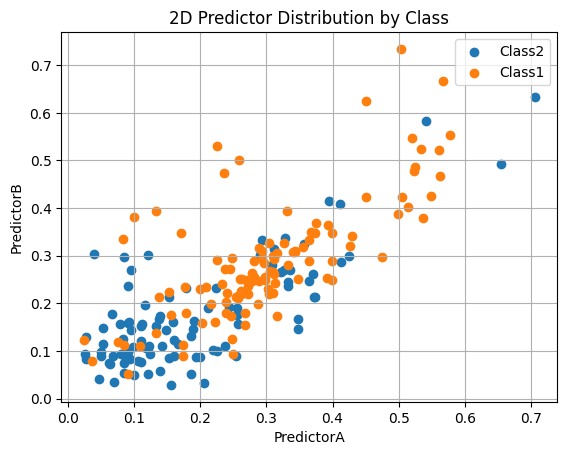

In [3]:
import matplotlib.pyplot as plt

df = X.copy()
df['Class'] = y
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['PredictorA'], subset['PredictorB'], label=label)
plt.xlabel('PredictorA')
plt.ylabel('PredictorB')
plt.title('2D Predictor Distribution by Class')
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Split into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')

Training samples: 166
Testing samples: 42


### Step 4: Train a Logistic Regression model

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Step 5: Predict and evaluate using accuracy

In [6]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(f'Accuracy on Test Set: {accuracy_score(y_test, y_pred):.3f}')

Accuracy on Test Set: 0.698


### Step 6: Try these

- Try changing the `test_size` to 0.2 or 0.5 and compare accuracy.
- Replace `LogisticRegression` with a `KNeighborsClassifier` or `DecisionTreeClassifier`.
- Plot the decision boundary using a meshgrid (ideal for 2D datasets).
- Use `classification_report` or `confusion_matrix` for a deeper evaluation.
- If class distribution is skewed, try using `stratify=y` in `train_test_split`.